In [0]:
# Set Train and Test Directory Variables
TRAIN_DATA_DIR = "flower_data/train/"
VALID_DATA_DIR = "flower_data/valid/"

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("/content"))

# Any results you write to the current directory are saved as output.

['.config', 'cat_to_name.json', 'classifier.pth', 'model.pt', 'flower_data.zip', 'deep-learning-flower-identifier', 'helper.py', 'flower_data', 'flower_data_orginal_test', 'sample_data']


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Class Directory:  37


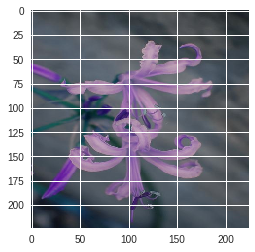

(224, 224, 3)


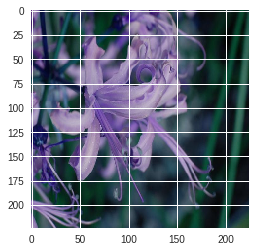

(224, 224, 3)


In [5]:
#Visualiza Some Images of any Random Directory-cum-Class
FILE_DIR = str(np.random.randint(1,103))
print("Class Directory: ",FILE_DIR)
for file_name in os.listdir(os.path.join(TRAIN_DATA_DIR, FILE_DIR))[1:3]:
    img_array = cv2.imread(os.path.join(TRAIN_DATA_DIR, FILE_DIR, file_name))
    img_array = cv2.resize(img_array,(224, 224), interpolation = cv2.INTER_CUBIC)
    plt.imshow(img_array)
    plt.show()
    print(img_array.shape)

In [6]:
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn as nn
torch.__version__

'0.4.1'

In [7]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [0]:
# I used os.listdir() to maintain the ordering 
classes = os.listdir(VALID_DATA_DIR)

In [9]:
# Load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                     transforms.RandomRotation(30),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(TRAIN_DATA_DIR, transform=data_transform)
test_data = datasets.ImageFolder(VALID_DATA_DIR, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  6552
Num test images:  818


In [11]:
# Visualize some sample data

# obtain one batch of training images
#dataiter = iter(train_loader)
#images, labels = dataiter.next()
#images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
#fig = plt.figure(figsize=(25, 4))
#for idx in np.arange(20):
#    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
#    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
#    ax.set_title(classes[labels[idx]])

ValueError: ignored

In [0]:
# define dataloader parameters
batch_size = 64
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

In [12]:
# Load the pretrained model from pytorch
model = models.vgg16(pretrained=True)  
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [13]:
print(model.classifier[6].in_features) 
print(model.classifier[6].out_features)
# The above lines work for vgg only. For other models refer to print(model) and look for last FC layer

4096
1000


In [0]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.vgg16(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = False
    
model.classifier = nn.Sequential(nn.Linear(25088, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(4096, 4096),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(4096, 1000),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(1000, 600),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(600, 200),
                                 nn.ReLU(),
                                 nn.Dropout(0.3),
                                 nn.Linear(200, 102),
                                 nn.LogSoftmax(dim=1))
model.to(device);
#For models like ResNet or Inception use the following,

# Freeze training for all "features" layers
#     for _, param in model.named_parameters():
#         param.requires_grad = False

In [19]:
# VGG16  
## n_inputs = model.classifier[6].in_features

#Others
# n_inputs = model.fc.in_features

# add last linear layer (n_inputs -> 102 flower classes)
# new layers automatically have requires_grad = True
#last_layer = nn.Linear(n_inputs, len(classes))

# VGG16
#model.classifier[6] = last_layer

# Others
#model.fc = last_layer

# if GPU is available, move the model to GPU
#if train_on_gpu:
#    model.cuda()

# check to see that your last layer produces the expected number of outputs

#VGG
print(model.classifier[15].out_features)
#Others
model

102


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.01 or 0.001
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [21]:
# Define epochs (between 50-200)
epochs = 50
# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

# Some lists to keep track of loss and accuracy during each epoch
epoch_list = []
train_loss_list = []
val_loss_list = []
train_acc_list = []
val_acc_list = []
# Start epochs
for epoch in range(epochs):
    
    #adjust_learning_rate(optimizer, epoch)
    
    # monitor training loss
    train_loss = 0.0
    val_loss = 0.0
    
    ###################
    # train the model #
    ###################
    # Set the training mode ON -> Activate Dropout Layers
    model.train() # prepare model for training
    # Calculate Accuracy         
    correct = 0
    total = 0
    
    # Load Train Images with Labels(Targets)
    for data, target in train_loader:
        
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        if type(output) == tuple:
            output, _ = output
        
        # Calculate Training Accuracy 
        predicted = torch.max(output.data, 1)[1]        
        # Total number of labels
        total += len(target)
        # Total correct predictions
        correct += (predicted == target).sum()
        
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    
    # calculate average training loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)
    
    # Avg Accuracy
    accuracy = 100 * correct / float(total)
    
    # Put them in their list
    train_acc_list.append(accuracy)
    train_loss_list.append(train_loss)
    
        
    # Implement Validation like K-fold Cross-validation 
    
    # Set Evaluation Mode ON -> Turn Off Dropout
    model.eval() # Required for Evaluation/Test

    # Calculate Test/Validation Accuracy         
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:


            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Predict Output
            output = model(data)
            if type(output) == tuple:
                output, _ = output

            # Calculate Loss
            loss = criterion(output, target)
            val_loss += loss.item()*data.size(0)
            # Get predictions from the maximum value
            predicted = torch.max(output.data, 1)[1]

            # Total number of labels
            total += len(target)

            # Total correct predictions
            correct += (predicted == target).sum()
    
    # calculate average training loss and accuracy over an epoch
    val_loss = val_loss/len(test_loader.dataset)
    accuracy = 100 * correct/ float(total)
    
    # Put them in their list
    val_acc_list.append(accuracy)
    val_loss_list.append(val_loss)
    
    # Print the Epoch and Training Loss Details with Validation Accuracy   
    print('Epoch: {} \tTraining Loss: {:.4f}\t Val. acc: {:.2f}%'.format(
        epoch+1, 
        train_loss,
        accuracy
        ))
    # save model if validation loss has decreased
    if val_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        val_loss))
        # Save Model State on Checkpoint
        torch.save(model.state_dict(), '/gdrive/My Drive/model1.pt')
        valid_loss_min = val_loss
    # Move to next epoch
    epoch_list.append(epoch + 1)

Epoch: 1 	Training Loss: 4.6263	 Val. acc: 0.00%
Validation loss decreased (inf --> 4.624393).  Saving model ...


KeyboardInterrupt: ignored

In [22]:
model.load_state_dict(torch.load('model.pt'))

RuntimeError: ignored

In [0]:
#Save/Pickle the Model
torch.save(model, 'classifier.pth')

In [0]:
torch.save(model.state_dict(), '/gdrive/My Drive/model2.pt')

# 7. Visualize Model Training and Validation

In [0]:
# Training / Validation Loss
plt.plot(epoch_list,train_loss_list)
plt.plot(val_loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training/Validation Loss vs Number of Epochs")
plt.legend(['Train', 'Valid'], loc='upper right')
plt.show()

In [0]:
# Train/Valid Accuracy
plt.plot(epoch_list,train_acc_list)
plt.plot(val_acc_list)
plt.xlabel("Epochs")
plt.ylabel("Training/Validation Accuracy")
plt.title("Accuracy vs Number of Epochs")
plt.legend(['Train', 'Valid'], loc='best')
plt.show()

**Overall Accuracy
**

In [0]:
val_acc = sum(val_acc_list[:]).item()/len(val_acc_list)
print("Validation Accuracy of model = {} %".format(val_acc))

# 8. Test our Model Performance 

In [0]:
# obtain one batch of test images
#%matplotlib inline
#dataiter = iter(test_loader)
#images, labels = dataiter.next()
#img = images.numpy()

# move model inputs to cuda, if GPU available
#if train_on_gpu:
#    images = images.cuda()

#model.eval() # Required for Evaluation/Test
# get sample outputs
#output = model(images)
#if type(output) == tuple:
#            output, _ = output
# convert output probabilities to predicted class
##_, preds_tensor = torch.max(output, 1)
#preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
#fig = plt.figure(figsize=(20, 5))
#for idx in np.arange(12):
#    ax = fig.add_subplot(3, 4, idx+1, xticks=[], yticks=[])
#    plt.imshow(np.transpose(img[idx], (1, 2, 0)))
#    ax.set_title("Pr: {} Ac: {}".format(classes[preds[idx]], classes[labels[idx]]),
#                 color=("green" if preds[idx]==labels[idx].item() else "red"))

## 8.1 Test our Model Performance with Gabriele Picco's Program
**Credits: ** **Gabriele Picco** (https://github.com/GabrielePicco/deep-learning-flower-identifier)

**Special Instruction:**  
1. **Uncomment the following two code cells while running the notebook.**
2. Comment these two blocks while **Commit**, otherwise you will get an error "Too many Output Files" in Kaggle Only.
3. If you find a solution to this then let me know.

In [0]:
!git clone https://github.com/GabrielePicco/deep-learning-flower-identifier
!pip install airtable
import sys
sys.path.insert(0, 'deep-learning-flower-identifier')

In [0]:
from test_model_pytorch_facebook_challenge import calc_accuracy
calc_accuracy(model, input_image_size=224, use_google_testset=False)